2025-04-29 13:42:10.335651: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-29 13:42:10.338841: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 13:42:10.343884: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 13:42:10.366086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745934130.412347    8803 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745934130.42

Weird dataset - Min: 0 Max: 212


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-04-29 13:42:17.017830: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



Validation Accuracy after 5 epochs:
Wrong normalization (dividing by 255): 0.8763
Correct normalization (dividing by 212): 0.8713


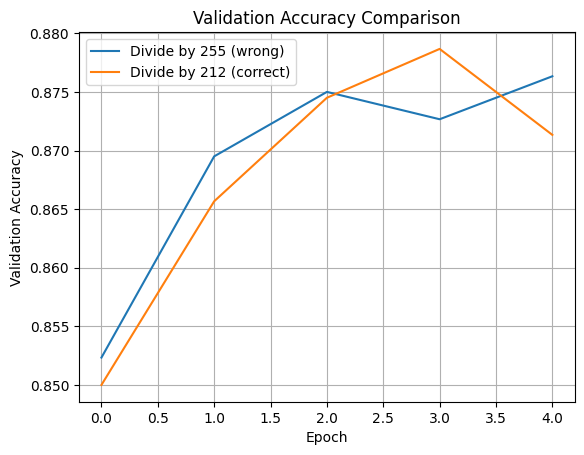

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Step 2: Create a weird version with max pixel value = 212
scale_factor = 212 / 255  # to shrink max pixel to 212
x_train_weird = (x_train * scale_factor).astype(np.uint8)
x_test_weird = (x_test * scale_factor).astype(np.uint8)

print("Weird dataset - Min:", x_train_weird.min(), "Max:", x_train_weird.max())

# Step 3: Preprocess two versions
# Wrong normalization: divide by 255
x_train_wrong = x_train_weird / 255.0
x_test_wrong = x_test_weird / 255.0

# Correct normalization: divide by 212
x_train_correct = x_train_weird / 212.0
x_test_correct = x_test_weird / 212.0

# Step 4: Define a simple model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

# Step 5: Train model with wrong normalization
model_wrong = create_model()
history_wrong = model_wrong.fit(x_train_wrong, y_train, epochs=5, validation_split=0.1, verbose=0)

# Step 6: Train model with correct normalization
model_correct = create_model()
history_correct = model_correct.fit(x_train_correct, y_train, epochs=5, validation_split=0.1, verbose=0)

# Step 7: Compare final validation accuracies
wrong_acc = history_wrong.history['val_accuracy'][-1]
correct_acc = history_correct.history['val_accuracy'][-1]

print("\nValidation Accuracy after 5 epochs:")
print(f"Wrong normalization (dividing by 255): {wrong_acc:.4f}")
print(f"Correct normalization (dividing by 212): {correct_acc:.4f}")

# Step 8: Optional: Plot comparison
plt.plot(history_wrong.history['val_accuracy'], label='Divide by 255 (wrong)')
plt.plot(history_correct.history['val_accuracy'], label='Divide by 212 (correct)')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
